In [1]:
! pip install pandas matplotlib seaborn yfinance

## Loading the Libraries

In [2]:
from matplotlib import dates
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import yfinance as yf  # a library to fetch stock data from Yahoo Finance
import seaborn as sns
import datetime as dt
import warnings 

In [3]:
raw = yf.download("SPY AAPL", start="2010-01-01", end="2023-01-01")

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  2 of 2 completed


In [4]:
raw.columns

MultiIndex([( 'Close', 'AAPL'),
            ( 'Close',  'SPY'),
            (  'High', 'AAPL'),
            (  'High',  'SPY'),
            (   'Low', 'AAPL'),
            (   'Low',  'SPY'),
            (  'Open', 'AAPL'),
            (  'Open',  'SPY'),
            ('Volume', 'AAPL'),
            ('Volume',  'SPY')],
           names=['Price', 'Ticker'])

In [5]:
# Function to fetch and clean stock data
def get_stock_data():
    raw = yf.download("SPY AAPL", start="2010-01-01", end="2023-01-01")
    df = pd.DataFrame(raw.iloc[:, ::2])  # skip every second column
    df.columns = [col[0] for col in df.columns]  # Simplify column names
    return df

# Use the cleaned data outside the function
df = get_stock_data()
print(df.head())  # Example usage

[*********************100%***********************]  2 of 2 completed


               Close      High       Low      Open     Volume
Date                                                         
2010-01-04  6.440331  6.455077  6.391279  6.422877  493729600
2010-01-05  6.451466  6.487879  6.417460  6.458087  601904800
2010-01-06  6.348846  6.477045  6.342226  6.451466  552160000
2010-01-07  6.337109  6.379843  6.291066  6.372319  477131200
2010-01-08  6.379241  6.379843  6.291368  6.328683  447610800


## Line Plot 

<Axes: title={'center': 'Stock Prices'}, xlabel='Date'>

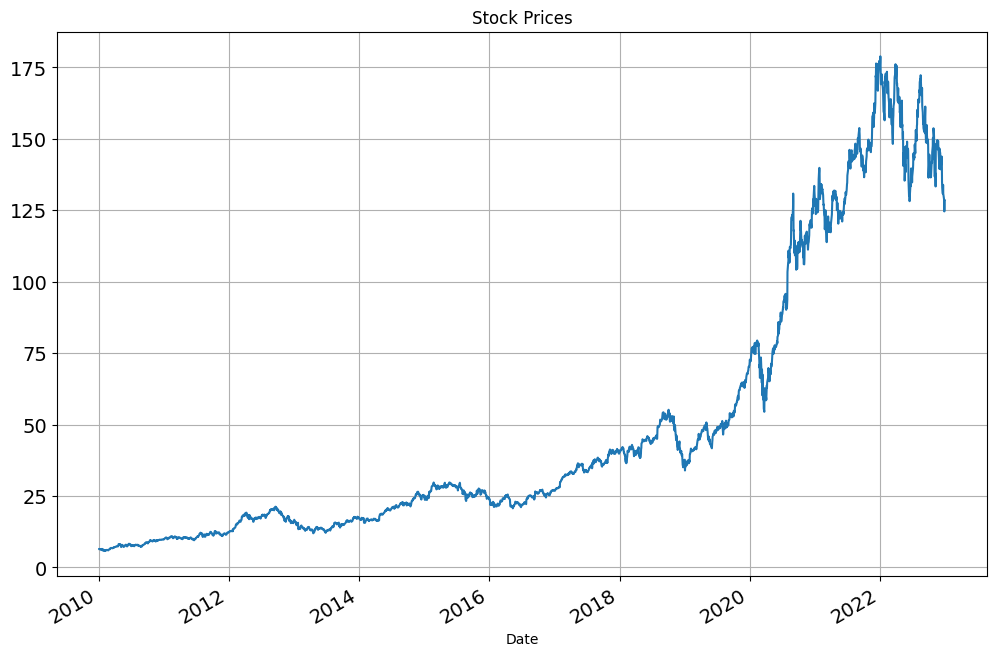

In [6]:
df.head()
df.Close.plot(figsize=(12, 8), title="Stock Prices", fontsize=14, grid=True)

<Axes: title={'center': 'Volume'}, xlabel='Date'>

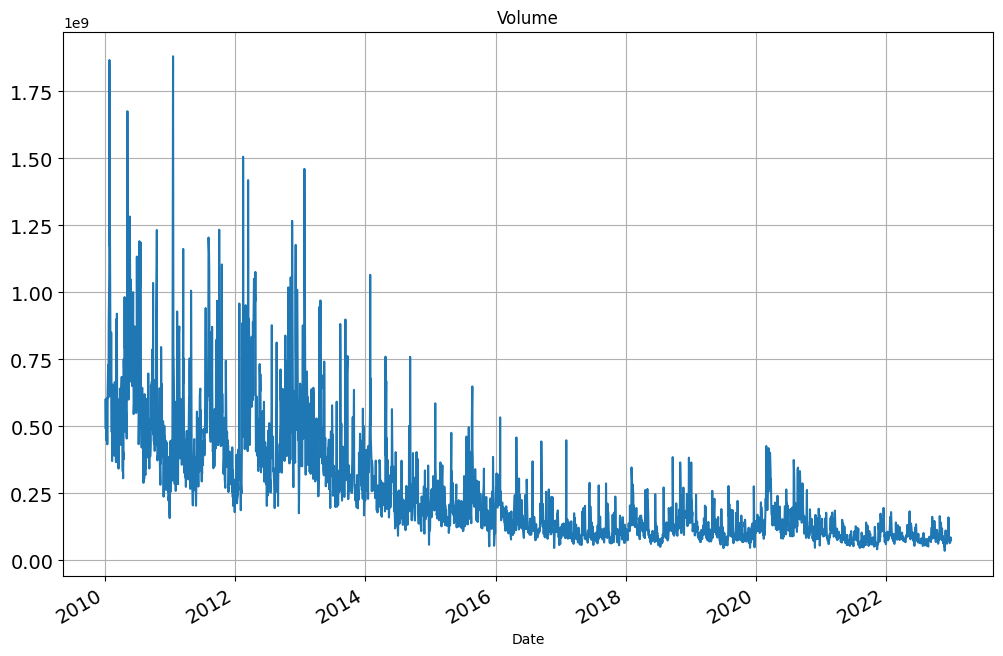

In [7]:
df.Volume.plot(figsize=(12, 8), title="Volume", fontsize=14, grid=True)

## Resampling

C:\Users\sankb\AppData\Local\Temp\ipykernel_13672\2147209198.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df.resample('M').Close.mean().plot(figsize=(15, 8), title="Monthly Average Closing Prices", fontsize=14, grid=True)


<Axes: title={'center': 'Monthly Average Closing Prices'}, xlabel='Date'>

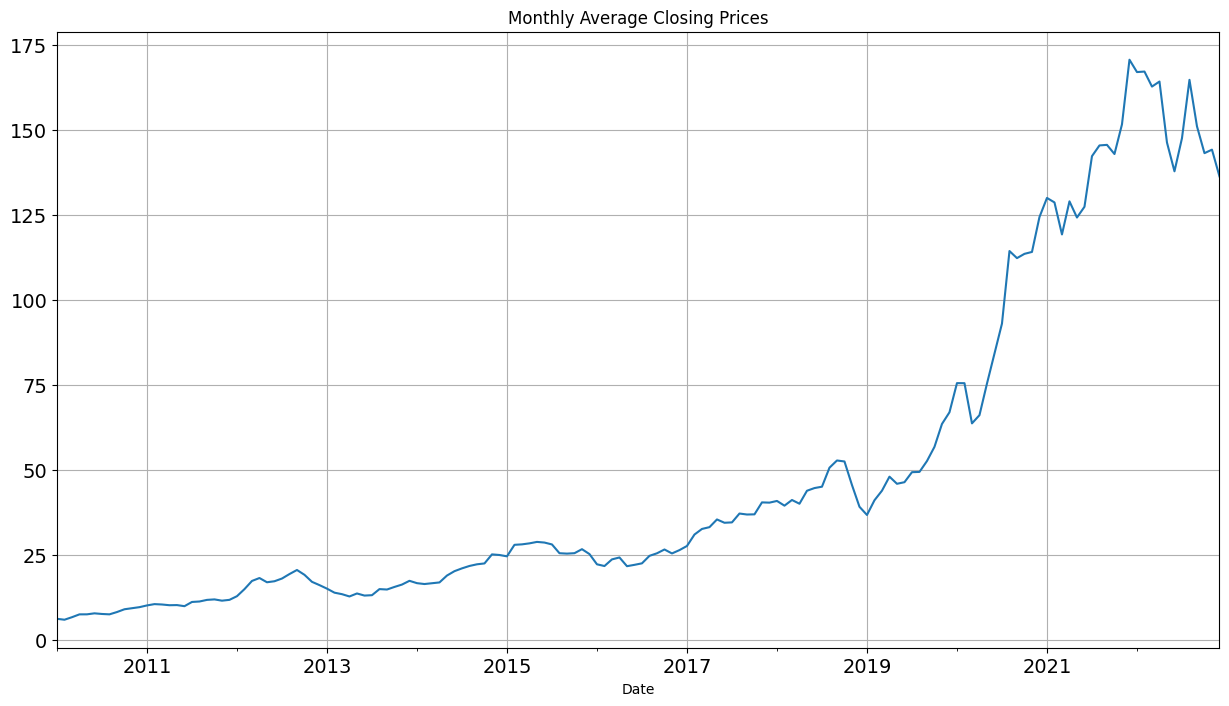

In [8]:
df.resample('M').Close.mean().plot(figsize=(15, 8), title="Monthly Average Closing Prices", fontsize=14, grid=True)

## Candlestick Plot 

Text(0.5, 0, 'Date')

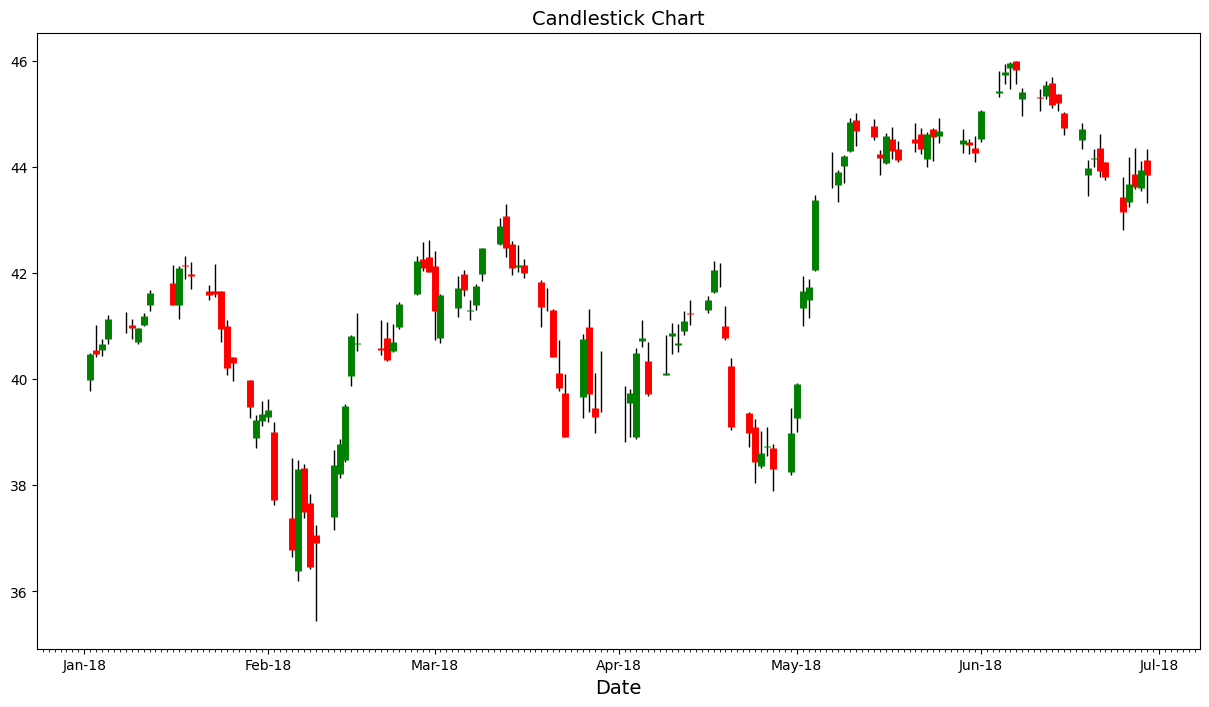

In [9]:
fig, ax = plt.subplots(figsize=(15, 8))

def plot_candle(df, ax):
    # Wick (high to low)
    ax.vlines(df.index, ymax=df.Low, ymin=df.High, color='black', linewidth=1)

    # Red candlesticks (price decrease)
    red = df.query('Close < Open')
    ax.vlines(red.index, ymax=red.Open, ymin=red.Close, color='red', linewidth=5)

    # Green candlesticks (price increase)
    green = df.query('Close > Open')
    ax.vlines(green.index, ymax=green.Close, ymin=green.Open, color='green', linewidth=5)

    # Adjust x-axis formatting
    ax.xaxis.set_major_locator(dates.MonthLocator(interval=1))  # Show every month
    ax.xaxis.set_major_formatter(dates.DateFormatter('%b-%y'))
    ax.xaxis.set_minor_locator(dates.DayLocator())

    return df

# Plot the candlestick chart

df.resample('d').agg({"Open": "first",
                      "Close": "last",
                     "High": "max",
                    "Low": "min"}).loc['Jan 2018': 'Jun 2018'].pipe(plot_candle, ax=ax)

plt.title("Candlestick Chart", fontsize=14)
plt.xlabel("Date", fontsize=14)


Text(0.5, 0, 'Date')

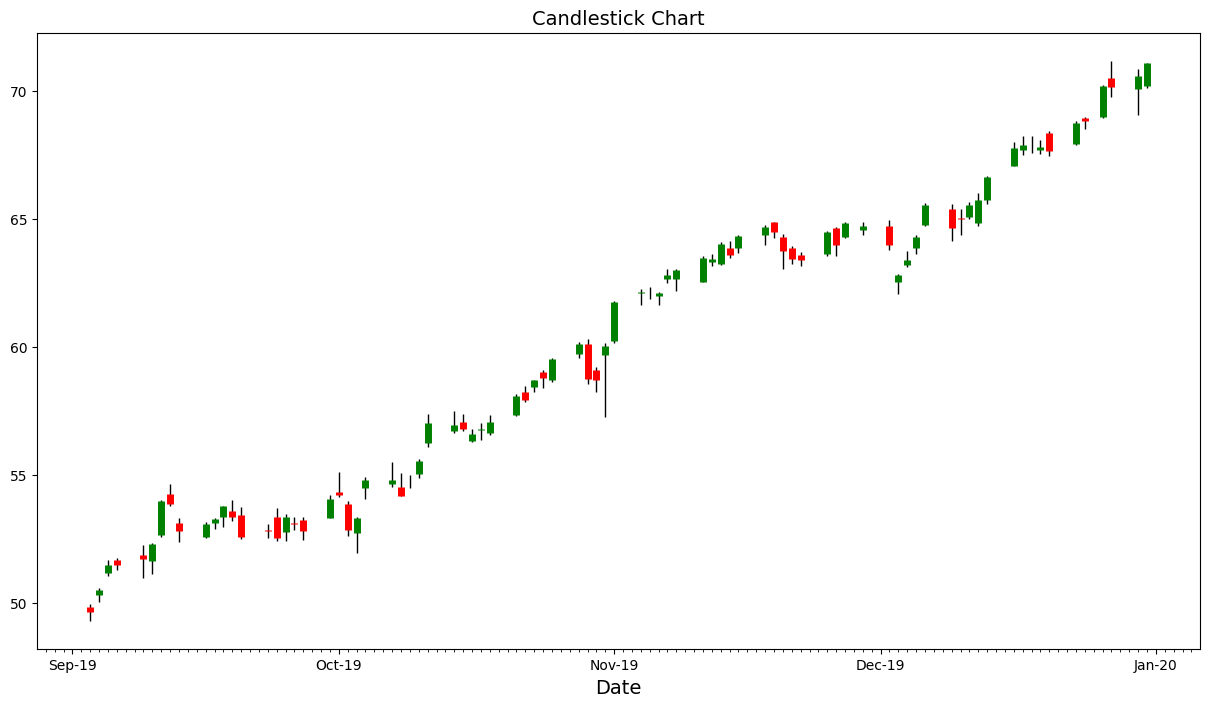

In [10]:
fig, ax = plt.subplots(figsize=(15, 8))

def plot_candle(df, ax):
    # Wick (high to low)
    ax.vlines(df.index, ymax=df.Low, ymin=df.High, color='black', linewidth=1)

    # Red candlesticks (price decrease)
    red = df.query('Close < Open')
    ax.vlines(red.index, ymax=red.Open, ymin=red.Close, color='red', linewidth=5)

    # Green candlesticks (price increase)
    green = df.query('Close > Open')
    ax.vlines(green.index, ymax=green.Close, ymin=green.Open, color='green', linewidth=5)

    # Adjust x-axis formatting
    ax.xaxis.set_major_locator(dates.MonthLocator(interval=1))  # Show every month
    ax.xaxis.set_major_formatter(dates.DateFormatter('%b-%y'))
    ax.xaxis.set_minor_locator(dates.DayLocator())

    return df

# Plot the candlestick chart


df.resample('d').agg({"Open": "first",
                      "Close": "last",
                     "High": "max",
                    "Low": "min"}).loc['Sep 2019': 'Dec 2019'].pipe(plot_candle, ax=ax)

plt.title("Candlestick Chart", fontsize=14)
plt.xlabel("Date", fontsize=14)

## Calutaing Returns on price 

In [11]:
df

,Close,High,Low,Open,Volume
Date,,,,,
2010-01-04,6.440331,6.455077,6.391279,6.422877,493729600
2010-01-05,6.451466,6.487879,6.417460,6.458087,601904800
2010-01-06,6.348846,6.477045,6.342226,6.451466,552160000
2010-01-07,6.337109,6.379843,6.291066,6.372319,477131200
2010-01-08,6.379241,6.379843,6.291368,6.328683,447610800
...,...,...,...,...,...
2022-12-23,130.344482,130.898044,128.149997,129.415284,63814900
2022-12-27,128.535522,129.899667,127.240581,129.870013,69007800
2022-12-28,124.591385,129.524031,124.423341,128.179661,85438400


In [12]:
df.pct_change()

,Close,High,Low,Open,Volume
Date,,,,,
2010-01-04,NaN,NaN,NaN,NaN,NaN
2010-01-05,0.001729,5.081598e-03,0.004096,0.005482,0.219098
2010-01-06,-0.015906,-1.669897e-03,-0.011723,-0.001025,-0.082646
2010-01-07,-0.001849,-1.500726e-02,-0.008067,-0.012268,-0.135882
2010-01-08,0.006648,3.582222e-08,0.000048,-0.006848,-0.061871
...,...,...,...,...,...
2022-12-23,-0.002798,-1.590365e-02,-0.005065,-0.025530,-0.180306
2022-12-27,-0.013878,-7.627136e-03,-0.007096,0.003514,0.081374
2022-12-28,-0.030685,-2.891734e-03,-0.022141,-0.013016,0.238098


## Plotting the Returns 

<Axes: xlabel='Date'>

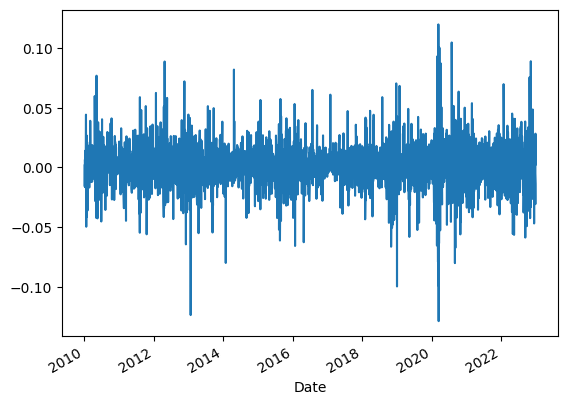

In [13]:
# Plot Returns

df.pct_change().Close.plot()

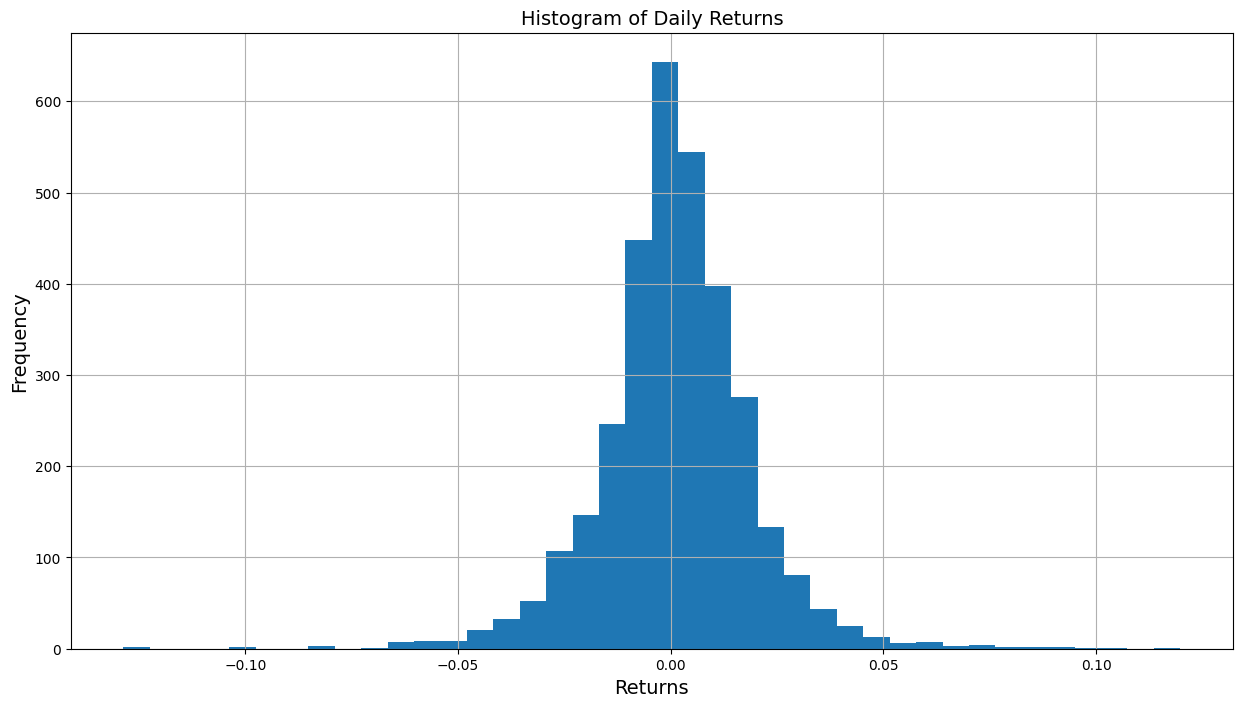

In [14]:
# Historgram of Returns

df.pct_change().Close.hist(bins=40, figsize=(15, 8), grid=True)
plt.title("Histogram of Daily Returns", fontsize=14)
plt.xlabel("Returns", fontsize=14)
plt.ylabel("Frequency", fontsize=14)
plt.grid(True)
plt.show()

<Axes: xlabel='Date'>

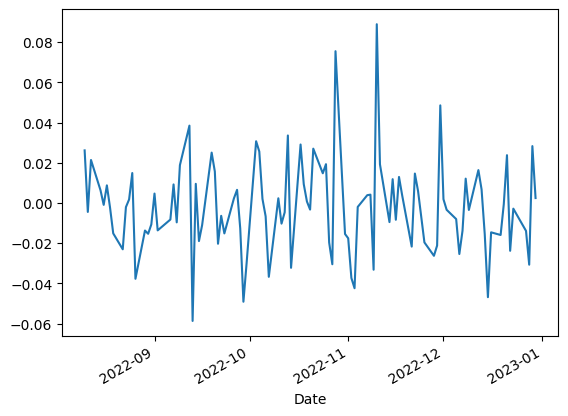

In [15]:
# Understanding ploting in Pandas is hude lever
# Bar Plot Retuns

df.pct_change().Close.iloc[-100:].plot()

## Cumulative Returns 
### Goal:
    - More Complicated Pandas
    - Refactoring into a function
    - Explore source
    - Creating new columns with .assign
    - llustrate lambda

    (Current_price - original_price)/original_price

C:\Users\sankb\AppData\Local\Temp\ipykernel_13672\2494078381.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  df.Close.sub(df.Close[0]).div(df.Close[0]).plot(figsize=(15, 8), title="Cumulative Returns", fontsize=14, grid=True)


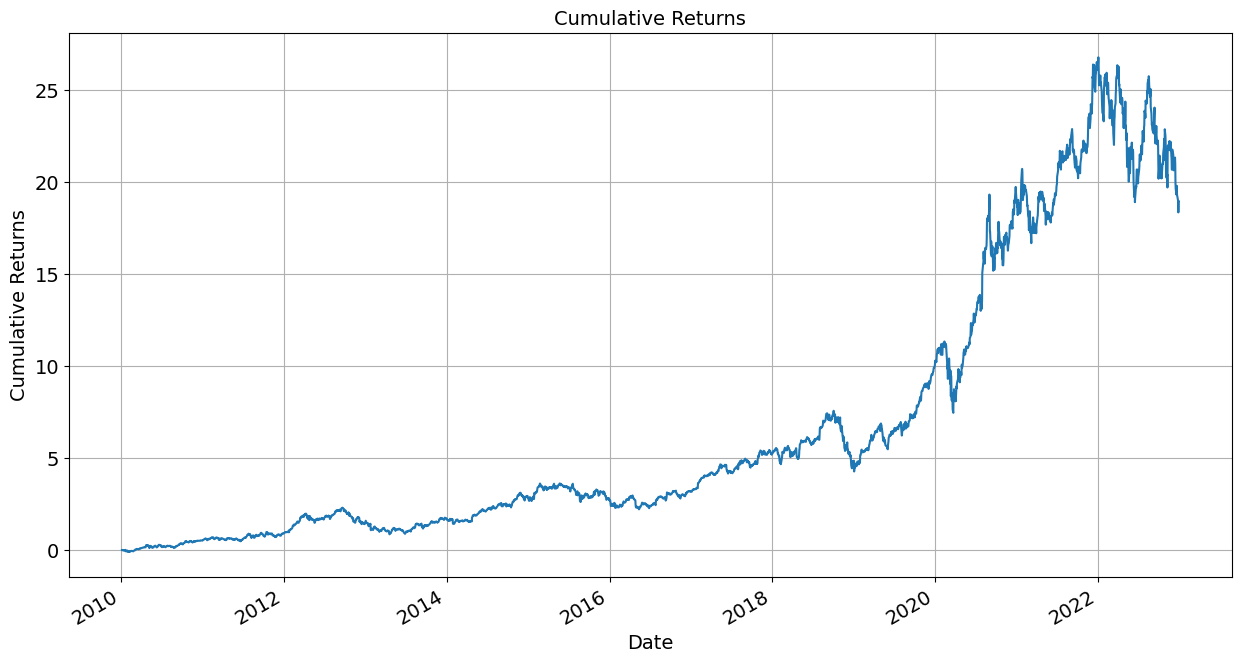

In [16]:
df.Close.sub(df.Close[0]).div(df.Close[0]).plot(figsize=(15, 8), title="Cumulative Returns", fontsize=14, grid=True)
plt.title("Cumulative Returns", fontsize=14)    
plt.xlabel("Date", fontsize=14)
plt.ylabel("Cumulative Returns", fontsize=14)
plt.grid(True)
plt.show()


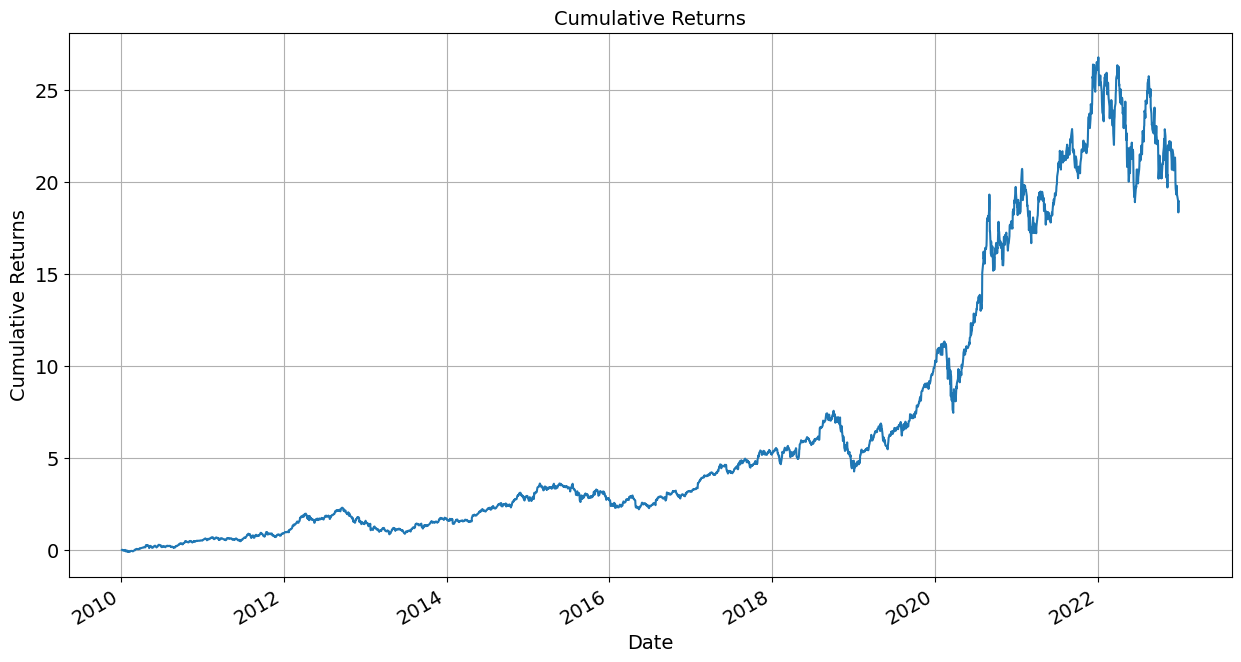

In [17]:
## Alternative way to plot Cumulative Returns   
# cumprod is a method that returns the cumulative product of the DataFrame or Series over a given axis.
# It is used to calculate the cumulative returns by multiplying the daily returns (1 + daily return) over time.
df.Close.pct_change().add(1).cumprod().sub(1).plot(figsize=(15, 8), title="Cumulative Returns", fontsize=14, grid=True)
plt.title("Cumulative Returns", fontsize=14)    
plt.xlabel("Date", fontsize=14)
plt.ylabel("Cumulative Returns", fontsize=14)
plt.grid(True)
plt.show()


In [18]:
## Creatring  a function to caluclate Cumulative Returns

def cal_cum(df,col):
    ser = df[col]
    return (ser.sub(ser[0]).div(ser[0])).rename("Cumulative Returns")


C:\Users\sankb\AppData\Local\Temp\ipykernel_13672\2804707173.py:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  return (ser.sub(ser[0]).div(ser[0])).rename("Cumulative Returns")


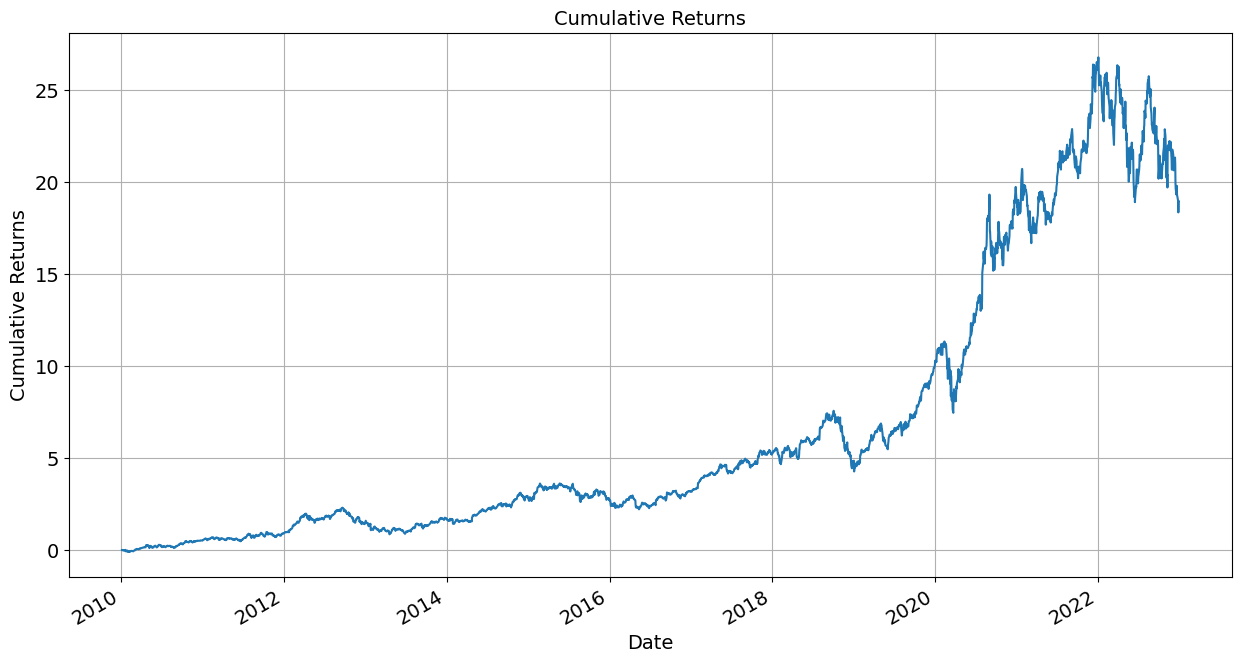

In [19]:
df.pipe(cal_cum, "Close").plot(figsize=(15, 8), title="Cumulative Returns", fontsize=14, grid=True)
plt.title("Cumulative Returns", fontsize=14)
plt.xlabel("Date", fontsize=14)
plt.ylabel("Cumulative Returns", fontsize=14)
plt.grid(True)
plt.show()


In [20]:
# Creating a column
df['Cumulative Returns'] = df.Close.sub(df.Close[0]).div(df.Close[0])
df.head(5)

C:\Users\sankb\AppData\Local\Temp\ipykernel_13672\150856752.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  df['Cumulative Returns'] = df.Close.sub(df.Close[0]).div(df.Close[0])


,Close,High,Low,Open,Volume,Cumulative Returns
Date,,,,,,
2010-01-04,6.440331,6.455077,6.391279,6.422877,493729600,0.000000
2010-01-05,6.451466,6.487879,6.417460,6.458087,601904800,0.001729
2010-01-06,6.348846,6.477045,6.342226,6.451466,552160000,-0.014205
2010-01-07,6.337109,6.379843,6.291066,6.372319,477131200,-0.016027
2010-01-08,6.379241,6.379843,6.291368,6.328683,447610800,-0.009486


## Chanllenge
#### PLot the rolling volatility over 30-day sliding window for 2015-2019

<Axes: title={'center': 'Rolling Volatility'}, xlabel='Date'>

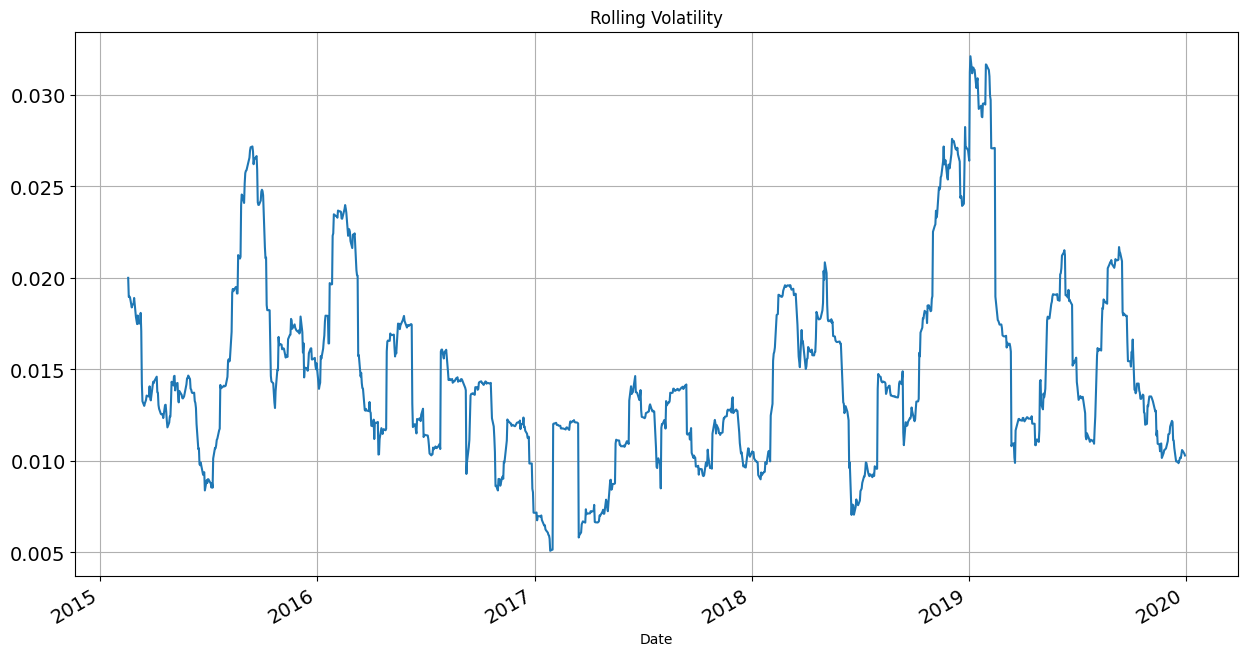

In [21]:
# PLot the rolling volatility over 30-day sliding window for 2015-2019

df.loc['2015':'2019'].Close.pct_change().rolling(30).std().plot(figsize=(15, 8), title="Rolling Volatility", fontsize=14, grid=True)

## Rolling Windows
### Simple moving Average 
#### Goal :
    - Building for roliing 
    - LLustrate lambda 
    - slicing

In [22]:
df['SMA_30'] =df['Close'].rolling(window=30).mean()


In [23]:
df.head()

,Close,High,Low,Open,Volume,Cumulative Returns,SMA_30
Date,,,,,,,
2010-01-04,6.440331,6.455077,6.391279,6.422877,493729600,0.000000,NaN
2010-01-05,6.451466,6.487879,6.417460,6.458087,601904800,0.001729,NaN
2010-01-06,6.348846,6.477045,6.342226,6.451466,552160000,-0.014205,NaN
2010-01-07,6.337109,6.379843,6.291066,6.372319,477131200,-0.016027,NaN
2010-01-08,6.379241,6.379843,6.291368,6.328683,447610800,-0.009486,NaN


In [24]:
df['SMA_30'].isnull().sum() 

np.int64(29)

In [25]:
df = df.assign(
    s1=df.Close.shift(1),
    s2=df.Close.shift(2),
    ma3=lambda x: x[['Close', 's1', 's2']].mean(axis='columns'),
    ma3_builtin=df.Close.rolling(3).mean()
) 

In [26]:
df.head()

,Close,High,Low,Open,Volume,Cumulative Returns,SMA_30,s1,s2,ma3,ma3_builtin
Date,,,,,,,,,,,
2010-01-04,6.440331,6.455077,6.391279,6.422877,493729600,0.000000,NaN,NaN,NaN,6.440331,NaN
2010-01-05,6.451466,6.487879,6.417460,6.458087,601904800,0.001729,NaN,6.440331,NaN,6.445899,NaN
2010-01-06,6.348846,6.477045,6.342226,6.451466,552160000,-0.014205,NaN,6.451466,6.440331,6.413548,6.413548
2010-01-07,6.337109,6.379843,6.291066,6.372319,477131200,-0.016027,NaN,6.348846,6.451466,6.379141,6.379141
2010-01-08,6.379241,6.379843,6.291368,6.328683,447610800,-0.009486,NaN,6.337109,6.348846,6.355065,6.355065


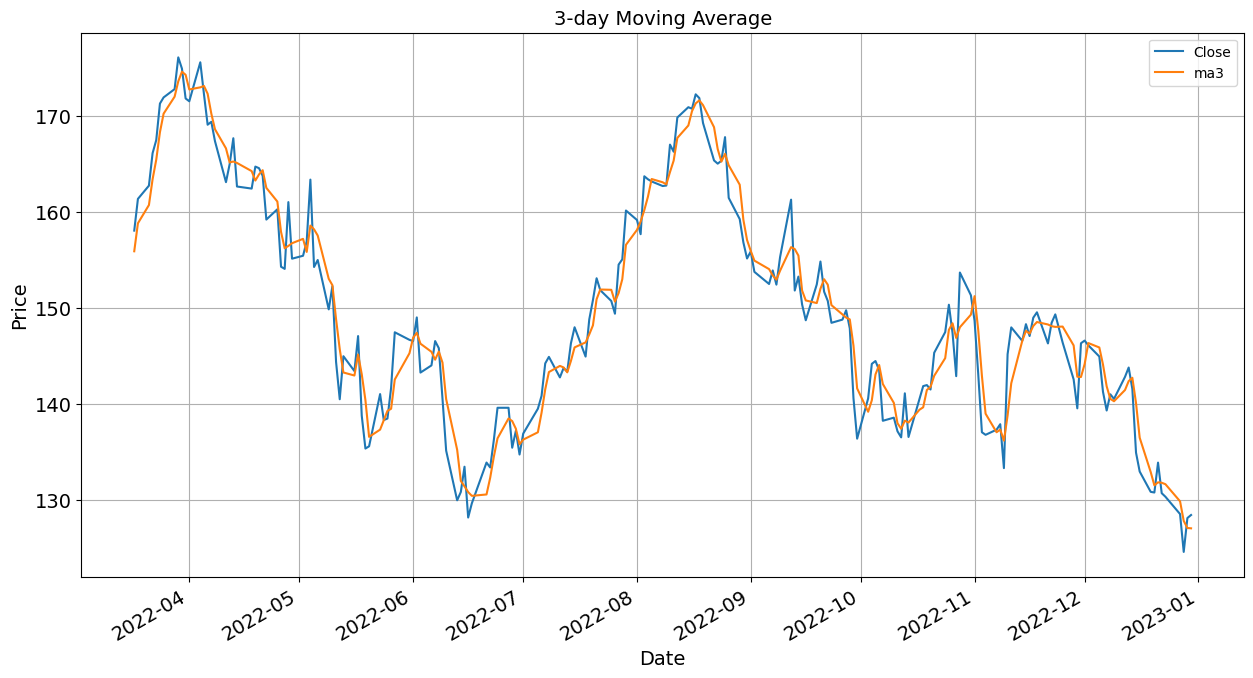

In [27]:
df.assign(
    s1=df.Close.shift(1),
    s2=df.Close.shift(2),
    ma3=lambda x: x[['Close', 's1', 's2']].mean(axis='columns'),
    ma3_builtin=df.Close.rolling(3).mean()
) 

df[['Close',"ma3"]].iloc[-200:].plot(figsize=(15, 8), title="3-day Moving Average", fontsize=14, grid=True)
plt.title("3-day Moving Average", fontsize=14)
plt.xlabel("Date", fontsize=14)
plt.ylabel("Price", fontsize=14)
plt.grid(True)
plt.show()

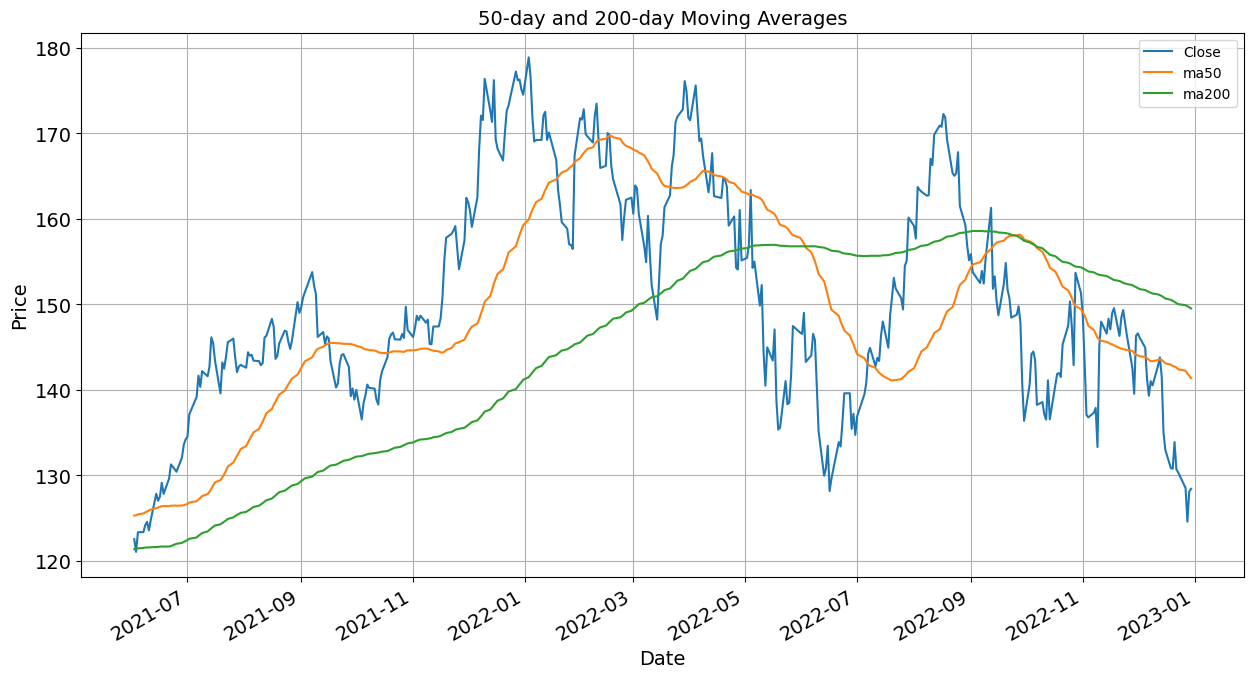

In [28]:
df = df.assign(
    ma50 =df.Close.rolling(50).mean(),
    ma200 =df.Close.rolling(200).mean(),
    )
df[['Close', 'ma50', 'ma200']].iloc[-400:].plot(figsize=(15, 8), title="50-day and 200-day Moving Averages", fontsize=14, grid=True)
plt.title("50-day and 200-day Moving Averages", fontsize=14)    
plt.xlabel("Date", fontsize=14)
plt.ylabel("Price", fontsize=14)
plt.grid(True)


## Challenge
##### Creating a plot three lines :
- APPLE closing price in 2015 
- Explonential moving average with alpha = 0.392
- Explonential moving average with alpha = 00995 


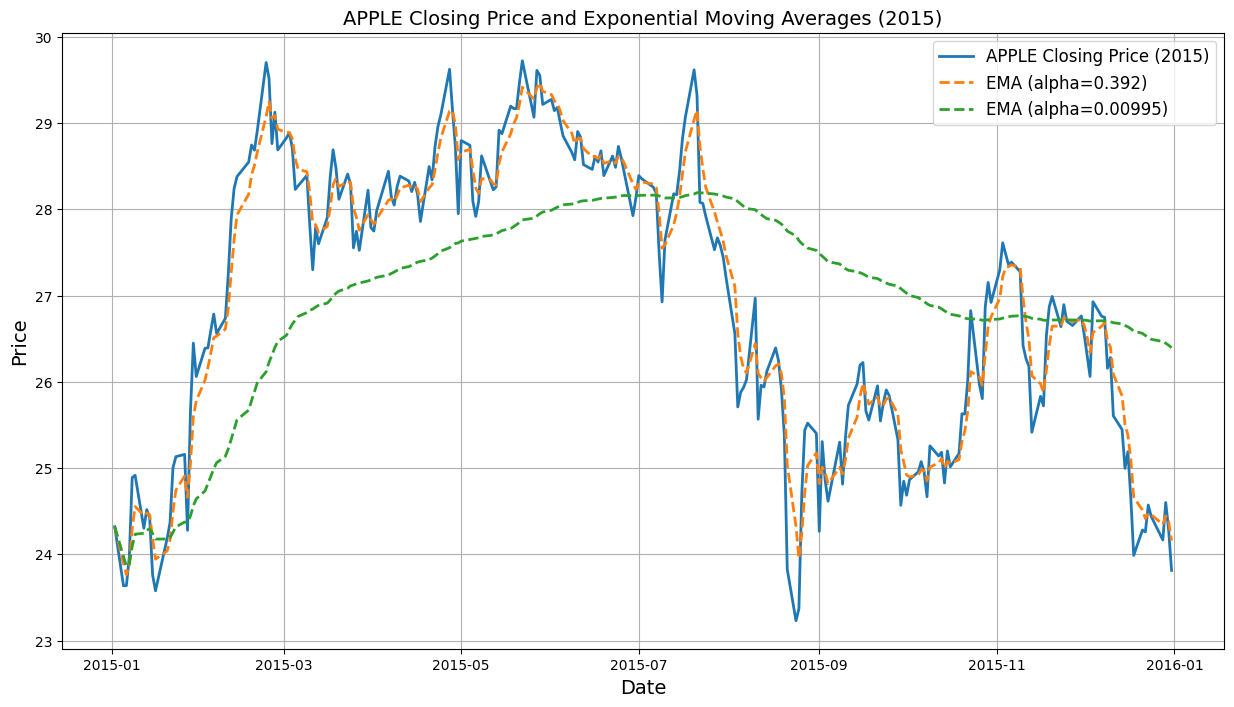

In [29]:
# Filter data for 2015
apple_2015 = df.loc['2015', 'Close']

# Calculate exponential moving averages
ema_0392 = apple_2015.ewm(alpha=0.392).mean()
ema_00995 = apple_2015.ewm(alpha=0.00995).mean()

# Plot the data
plt.figure(figsize=(15, 8))
plt.plot(apple_2015, label="APPLE Closing Price (2015)", linewidth=2)
plt.plot(ema_0392, label="EMA (alpha=0.392)", linestyle='--', linewidth=2)
plt.plot(ema_00995, label="EMA (alpha=0.00995)", linestyle='--', linewidth=2)

# Add title and labels
plt.title("APPLE Closing Price and Exponential Moving Averages (2015)", fontsize=14)
plt.xlabel("Date", fontsize=14)
plt.ylabel("Price", fontsize=14)
plt.legend(fontsize=12)
plt.grid(True)
plt.show()

## Technical Analysis

Goal :
- Show if/else in pandas
- Refactoring to functions

## On-Balance Volume (OBV) Formula

- If today's **closing price is higher** than yesterday’s:
  $$
  OBV = OBV_{\text{previous}} + \text{Volume}
  $$

- If today's **closing price is lower** than yesterday’s:
  $$
  OBV = OBV_{\text{previous}} - \text{Volume}
  $$

- If today's **closing price is the same** as yesterday’s:
  $$
  OBV = OBV_{\text{previous}}
  $$

**Where:**
- \( OBV \) = On-Balance Volume
- \( OBV_{\text{previous}} \) = OBV value from the previous day
- \( \text{Volume} \) = Trading volume of the current day
